In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [26]:
num_levels = 2

state_1 = (qt.basis([num_levels, num_levels], [0, 0]) + qt.basis([num_levels, num_levels], [1, 1])).unit()

# state_2 = qt.tensor([qt.basis(num_levels, 0) + qt.basis(num_levels, 1) for _ in range(2)]).unit()
state_2 = (qt.basis([num_levels, num_levels], [0, 1]) + qt.basis([num_levels, num_levels], [1, 0])).unit()


In [27]:
ts = np.linspace(0, 1, 101)

states = []
for t in ts:
    state_t = state_1 * np.power(np.cos(2*np.pi * t), 2) + state_2 * np.power(np.sin(2*np.pi * t), 2)
    states.append(state_t)


In [29]:
n1 = qt.tensor(qt.num(num_levels), qt.qeye(num_levels))
n2 = qt.tensor(qt.qeye(num_levels), qt.num(num_levels))

correlator = n1 * n2

measurement = np.zeros((2, len(states)))
correlation = np.zeros(len(states))
covariance = np.zeros(len(states))

measurement[0, :] = [qt.expect(n1, state) for state in states]
measurement[1, :] = [qt.expect(n2, state) for state in states]
correlator_value = [qt.expect(correlator, state) for state in states]
covariance = correlator_value - measurement[0, :]*measurement[1, :]

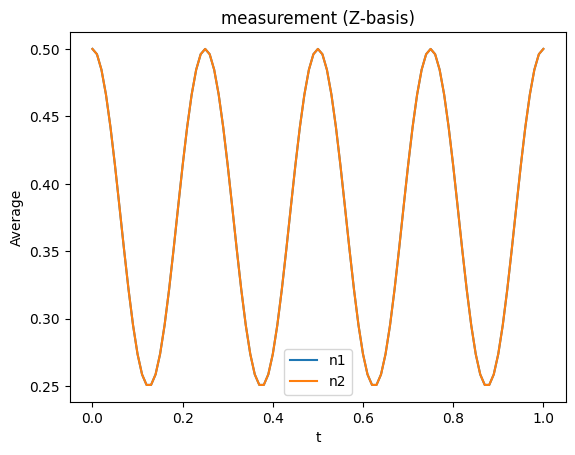

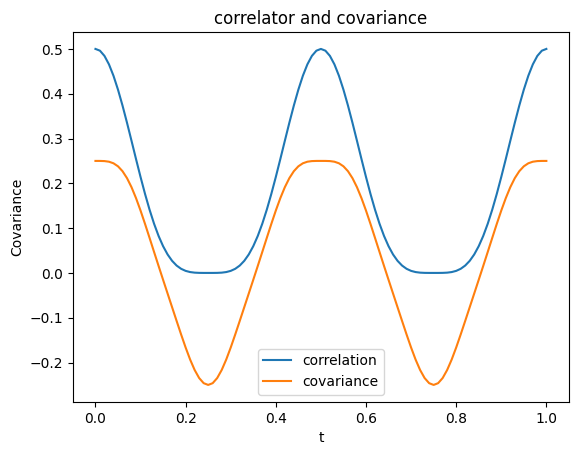

In [36]:
plt.plot(ts, measurement[0, :], label='n1')
plt.plot(ts, measurement[1, :], label='n2')

plt.xlabel('t')
plt.ylabel('Average')

plt.legend()
plt.title('measurement (Z-basis)')
plt.show()


plt.plot(ts, correlator_value, label='correlation')
plt.plot(ts, covariance, label='covariance')
plt.xlabel('t')
plt.ylabel('Covariance')
plt.legend()
plt.title('correlator and covariance')
plt.show()


In [43]:
# x_operator = (qt.tensor(qt.sigmax(), qt.sigmax()) + qt.tensor(qt.sigmay(), qt.sigmay()))/2

x_1 = qt.tensor(qt.sigmax(), qt.qeye(num_levels))

x_angle = np.pi/2

x_unitary = (-1j * x_angle/2 * x_1).expm()
x_unitary

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        -0.70710678j]
 [0.        -0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

In [44]:
ts = np.linspace(0, 1, 101)

states = []
for t in ts:
    state_t = state_1 * np.power(np.cos(2*np.pi * t), 2) + state_2 * np.power(np.sin(2*np.pi * t), 2)
    state_t = x_unitary * state_t
    states.append(state_t)


In [45]:
n1 = qt.tensor(qt.num(num_levels), qt.qeye(num_levels))
n2 = qt.tensor(qt.qeye(num_levels), qt.num(num_levels))

correlator = n1 * n2

measurement = np.zeros((2, len(states)))
correlation = np.zeros(len(states))
covariance = np.zeros(len(states))

measurement[0, :] = [qt.expect(n1, state) for state in states]
measurement[1, :] = [qt.expect(n2, state) for state in states]
correlator_value = [qt.expect(correlator, state) for state in states]
covariance = correlator_value - measurement[0, :]*measurement[1, :]

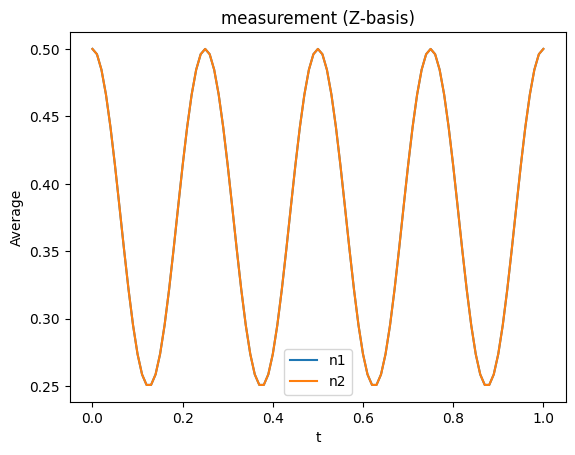

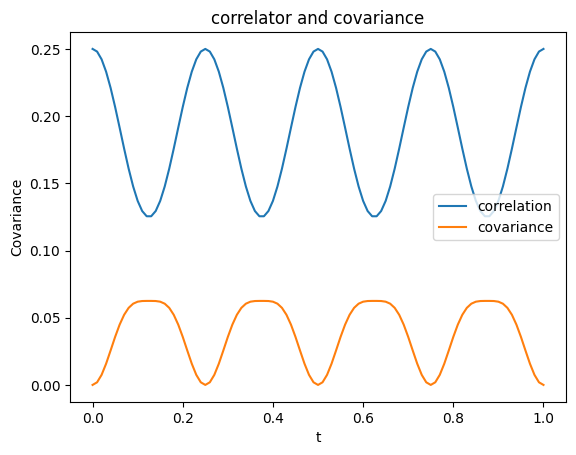

In [46]:
plt.plot(ts, measurement[0, :], label='n1')
plt.plot(ts, measurement[1, :], label='n2')

plt.xlabel('t')
plt.ylabel('Average')

plt.legend()
plt.title('measurement (Z-basis)')
plt.show()


plt.plot(ts, correlator_value, label='correlation')
plt.plot(ts, covariance, label='covariance')
plt.xlabel('t')
plt.ylabel('Covariance')
plt.legend()
plt.title('correlator and covariance')
plt.show()
